# Regresión Logística: Ejercicio Propuesto
Pisaña patrick - 19200093

En este proyecto, trabajaremos con un conjunto de datos publicitarios falsos, que indica si un determinado usuario de Internet hizo clic en un anuncio o no. Trataremos de crear un modelo que prediga si harán clic en un anuncio basado en las características de ese usuario.

Este conjunto de datos contiene las siguientes características:

* 'Daily Time Spent on Site': el tiempo del cliente en el sitio en minutos
* 'Age': edad del cliente en años
* 'Area Income': Prom. Ingresos del área geográfica del cliente
* 'Daily Internet Usage': Prom. minutos al día del cliente en internet
* 'Ad Topic Line': título del anuncio
* 'City': ciudad del cliente
* 'Male': si el cliente era o no hombre
* 'Country': País del cliente
* 'Timestamp': hora en la que el consumidor hizo clic en el Anuncio o cerró la ventana
* 'Clicked on Ad': 0 or 1 si se hizo clic en el anuncio

## Importación de Librerias

**Importe algunas bibliotecas que crea que necesitará (¡o simplemente importelas a medida que avanza!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Recupere los datos
**Lea en el archivo advertising.csv y configúrelo en un data frame llamado ad_data. **

In [3]:
ad_data = pd.read_csv('advertising.csv')

**Revise las primeras filas de ad_data**

In [4]:
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

** Use info y describe() en ad_data**

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

## Análisis de Datos Exploratorio

¡Usemos seaborn para explorar los datos!

¡Intenta recrear los trazados que se muestran a continuación!

** Crea un histograma de la edad **

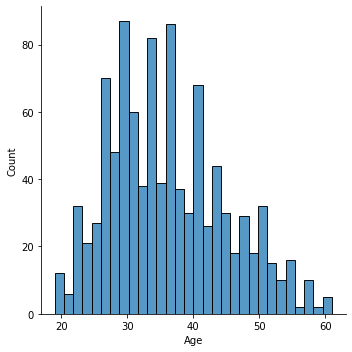

In [15]:
sns.displot(ad_data['Age'], bins=30 )

<AxesSubplot:>

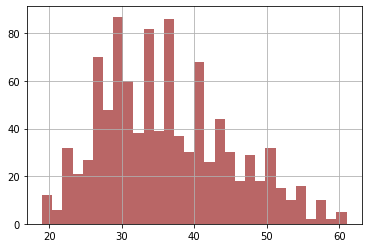

In [21]:
ad_data['Age'].hist(bins=30,color='darkred',alpha=0.6)

**Crear un jointplot mostrando Area Income vs Age.**

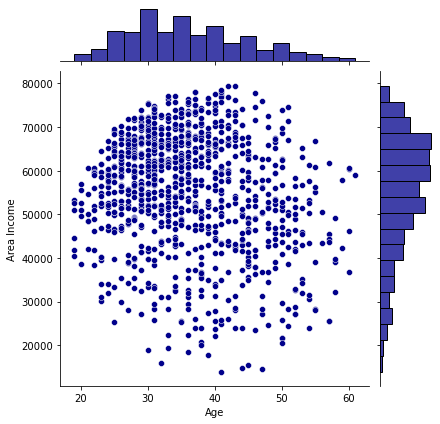

In [24]:
sns.jointplot(x = 'Age' , y='Area Income', data = ad_data, color = 'darkblue' )

**Crear un jointplot mostrando la distribución kde de "Daily Time spent on site" vs. "Age".**

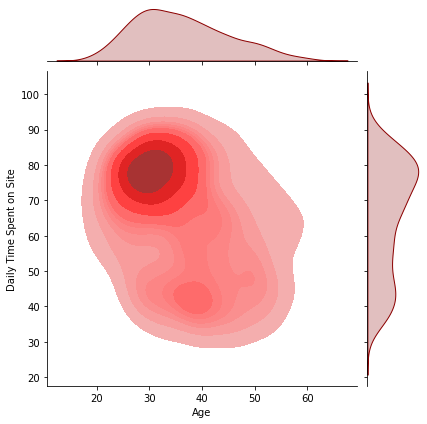

In [30]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde',color='darkred',fill=True)

** Crear un jointplot de "Daily Time Spent on Site" vs. "Daily Internet Usage"**

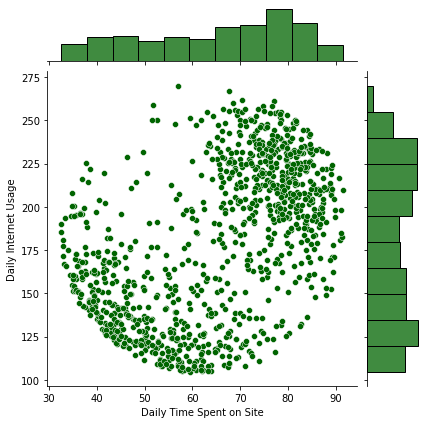

In [32]:
sns.jointplot(x = 'Daily Time Spent on Site' , y='Daily Internet Usage', data = ad_data, color = 'darkgreen' )

** Finalmente, crear un pairplot con el hue definido por la columna característica "Clicked on Ad".**

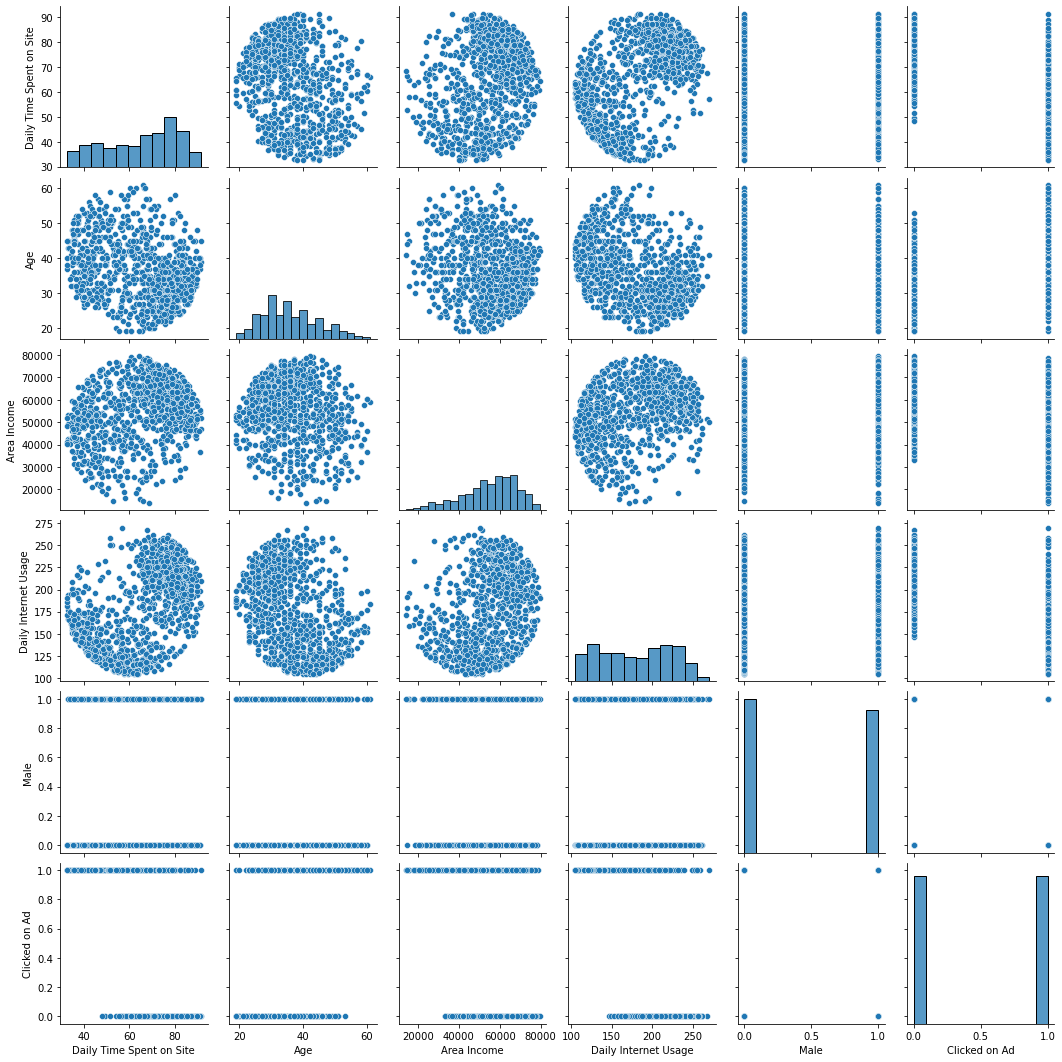

In [50]:
sns.pairplot(ad_data, diag_kind="hist", hue_order="Clicked on Ad")

# Regresión Logística

¡Dividamos en datos de entrenamiento y de prueba, y entrenemos nuestro modelo!

¡Tendrás libertad para elegir las columnas con las que quieras entrenar!

**Divida los datos en el conjunto de entrenamiento y prueba usando train_test_split**

In [51]:
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [52]:
ad_data.drop(['Ad Topic Line','City','Country','Timestamp','Age','Area Income', 'Male'],axis=1,inplace=True)

In [53]:
ad_data.head(15)

Daily Time Spent on Site  Daily Internet Usage  Clicked on Ad
0                      68.95                256.09              0
1                      80.23                193.77              0
2                      69.47                236.50              0
3                      74.15                245.89              0
4                      68.37                225.58              0
5                      59.99                226.74              0
6                      88.91                208.36              0
7                      66.00                131.76              1
8                      74.53                221.51              0
9                      69.88                183.82              0
10                     47.64                122.02              1
11                     83.07                230.87              0
12                     69.57                113.12              1
13                     79.52                214.23              0
14                     42.95                143.56              1

** Entrene y ajuste un modelo de regresión logística con el conjunto de entrenamiento.**

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = ad_data.drop('Clicked on Ad',axis=1)

In [56]:
X.head()

Daily Time Spent on Site  Daily Internet Usage
0                     68.95                256.09
1                     80.23                193.77
2                     69.47                236.50
3                     74.15                245.89
4                     68.37                225.58

In [57]:
y=ad_data['Clicked on Ad']

In [58]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=101)

In [60]:
from sklearn.linear_model import LogisticRegression

In [62]:
logmodel = LogisticRegression(max_iter=1000)

In [63]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Predicciones y Evaluaciones
** Ahora pronostique los valores para los datos de prueba.**

In [64]:
predictions = logmodel.predict(X_test)

In [65]:
y_test

545    1
298    0
109    0
837    1
194    0
      ..
847    0
682    1
884    0
325    1
482    0
Name: Clicked on Ad, Length: 300, dtype: int64

In [66]:
X_test

Daily Time Spent on Site  Daily Internet Usage
545                     42.60                168.29
298                     80.39                214.74
109                     74.02                210.54
837                     55.77                117.33
194                     77.20                254.05
..                        ...                   ...
847                     88.82                169.10
682                     43.57                125.20
884                     70.92                249.81
325                     36.87                195.91
482                     69.42                213.38

[300 rows x 2 columns]

In [67]:
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
matriz=confusion_matrix(y_test,predictions)
print(matriz)

[[153   4]
 [ 10 133]]


**Crea un reporte de clasificación para el modelo.**

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       157
           1       0.97      0.93      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



**Escriba algunos comentarios sobre los resultados**

las exactitud de las predicciones depende de las variables que tomes en cuenta, por eso es fundamental tener la certeza de con que variables trabajar y cuales no.

## ¡Buen trabajo!